In [1]:
import pandas as pd
import sqlalchemy as sql
import spacy
from sql_functions import get_dataframe

In [ ]:
t = get_dataframe('SELECT * FROM hh_analytics_23_3.yelp_review_pa')

### Keyword analysis with keyBERT

In [ ]:
from keybert import KeyBERT

In [ ]:
model = KeyBERT()

In [ ]:
model.extract_keywords(text)

In [ ]:
# Work with bigrams and trigrams

model.extract_keywords(text, keyphrase_ngram_range=(1, 2))

In [ ]:
# Remove stop-words from a text. Stop-word are words that are irrelevant and are sometimes so ubiquitous in a text that they mess up the results.

model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english')

In [ ]:
# Highlight all the important words in a document

model.extract_keywords(text, highlight=True)

In [ ]:
for index, text in enumerate(t['text']):
    if index > 10:
        break
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 6), stop_words=None)
    print(text, keywords)

### Sentiment analysis with spacytextblob plus keyword analysis with rake-spacy

https://importsem.com/evaluate-sentiment-analysis-in-bulk-with-spacy-and-python/

https://www.section.io/engineering-education/sentiment-analysis-with-spacy-and-scikit-learn/

https://spacy.io/universe/project/spacy-textblob

In [ ]:
import pandas as pd

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')
text = 'I had a really horrible day. It was the worst day ever!'

doc = nlp(text)
# doc._.blob.polarity                            # Polarity: -0.125 1.0 is very positive and -1.0 is very negative
# doc._.blob.subjectivity                        # Subjectivity: 0.9, 0.0 is very objective and 1.0 is very subjective 
doc._.blob.sentiment_assessments.assessments   # Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]
# doc._.blob.ngrams()

In [ ]:
import pandas as pd

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

reviews = pd.read_csv('data/review_test.csv')

nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')


for text in reviews['text']:
    doc = nlp(text)
    doc._.blob.polarity
    doc._.blob.subjectivity
    doc._.blob.sentiment_assessments.assessments
    # doc._.blob.ngrams()

https://spacy.io/universe/project/spacy-pytextrank

https://pypi.org/project/rake-spacy/

Remove stop-words with Spacy: https://machinelearningknowledge.ai/tutorial-for-stopwords-in-spacy/

### Keyword analysis with rake spacy on reviews/results sentiment Sining

In [1]:
import pandas as pd

reviews = pd.read_csv('data/review_pa_sentiment.csv')

In [2]:
reviews[['sentiment_label', 'sentiment_score']] = reviews['result'].str.split(', ', expand=True)
reviews[['delete', 'sentiment_label']] = reviews['sentiment_label'].str.split(' ', expand=True)

In [3]:
reviews['sentiment_label'] = reviews['sentiment_label'].str.replace('LABEL_2', 'Positive')
reviews['sentiment_label'] = reviews['sentiment_label'].str.replace('LABEL_1', 'Neutral')
reviews['sentiment_label'] = reviews['sentiment_label'].str.replace('LABEL_0', 'Negative')

reviews['sentiment_label'] = reviews['sentiment_label'].str.replace("'", "")

In [4]:
reviews.drop(columns=['delete', 'result', 'sentiment_score'], inplace=True, errors='ignore')

In [5]:
neg_reviews = reviews[reviews['sentiment_label'] == 'Negative']

In [7]:
neg_reviews

,business_id,review_id,text,sentiment_label
10,WbxPdq_PgVvCI462l0vPEQ,qfPqEn8hDJ5RpMay9jeDJQ,"Poor service, the drive through is open 24 hou...",Negative
16,8va8lpVU8aiQtnSbyjVScA,SsxNks2Kkhh6G1ulSU1fig,Does not really provide the real philly cheese...,Negative
21,o2i4AvqF6Q9lWK-wksxzuw,oXD4_mSslmhSzFBzzHhY3Q,Never going back. After visiting multiple time...,Negative
22,tdWrPT2XT2NpPtfQQhf08w,FqBl4Y9I9rA2QbFa1bQGbA,My sister and I went here for the all you can ...,Negative
33,Iw8uqNPxviwcgxtruAx_LA,RE9pOuEb0kYAzbgGPcMZmA,I'm only giving three stars because the food I...,Negative
...,...,...,...,...
1184867,mQO7LKZ1LHq0LLBO_Kg_rw,CXhYsqWe6CxYstBXPTgU3A,Ordered a Taco pizza tonight and it came with ...,Negative
1184868,lRpOWh8A7PlpDIkVEKpsQg,VHMHunKnQNjPgAizjUyclA,Just got a nyc style thin crust with pepperoni...,Negative
1184876,9_B5sCqKBOKDAmYpByiFFg,gGfFShzJ8PMfo3F-8PzUPA,"When we arrived at the restaurant, the hostess...",Negative
1184878,pqujXRfvvMSjcVLfzzKghQ,_9j5m3vmRLup_jRwdCDhYQ,Menu price for 12 wings is $7.95 which is not ...,Negative


In [6]:
reviews_text = ''

for item in neg_reviews['text'][:1000]:
    reviews_text = reviews_text + ' ' + item

In [11]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_lg')

matcher = Matcher(nlp.vocab)
pattern = [{'POS': 'ADV', 'OP': '?'},{'POS': 'ADJ', 'OP': '+'}, {'POS': 'NOUN', 'OP': '+'}]
matcher.add('ADJECTIVE_NOUN', [pattern], greedy='LONGEST')
doc=nlp(reviews_text)
matches = matcher(doc)

# What about fuzzy machting?

In [12]:
print(len(matches))
for match in matches:
    print(match, doc[match[1]:match[2]])

3899
(6771729207237794900, 47850, 47856) chaotic loud busy bar type restaurants
(6771729207237794900, 103036, 103042) Various other shitty alternative rock groups
(6771729207237794900, 18526, 18531) generic carrot ginger miso dressing
(6771729207237794900, 28561, 28566) so many excellent Italian restaurants
(6771729207237794900, 37971, 37976) too many other good restaurants
(6771729207237794900, 41067, 41072) so many other great establishments
(6771729207237794900, 48376, 48381) slightly bland overpriced Indian food
(6771729207237794900, 48615, 48620) re-thawed multiple times
(6771729207237794900, 49697, 49702) favorite chocolate chip walnut cookie
(6771729207237794900, 50936, 50941) So many better food options
(6771729207237794900, 56326, 56331) soft serve ice cream machine
(6771729207237794900, 57410, 57415) great new fast food place
(6771729207237794900, 65570, 65575) only semi-edible dish
(6771729207237794900, 70339, 70344) so many other great places
(6771729207237794900, 71631, 71

In [1]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_lg')

matcher = Matcher(nlp.vocab)
pattern = [
    {'POS': 'NOUN'},
    {'LEMMA': 'be'},  # Add 'taste' and 'seem' to the list? Yields 7 and 8 more results.
    # {'DEP': 'neg', 'OP': '?'},
    # {'POS': 'ADV', 'OP': '*'},
    {'POS': 'ADJ'},
    {'POS': 'CCONJ', 'OP': '?'},
    {'POS': 'ADJ', 'OP': '?'}

]
matcher.add('NOUN_IS_ADJECTIVE', [pattern], greedy='LONGEST')
doc=nlp(reviews_text)
matches2 = matcher(doc)

# Maybe add a negation?
# Use displaycy to visualize findings?

NameError: name 'reviews_text' is not defined

In [18]:
doc[4905: 4911]

# How to include relative clauses?
# How to inlude sentences that start with a pronoun? 'it was burned'
# How to inlcude sentence that don't start with a noun or a pronoun? 'the fisch was salty AND COLD', additions with and

for token in doc[4905: 4911]:
    print(token, token.dep_)


the det
pepsi nsubj
i nsubj
bought relcl
was ROOT
delicious acomp


In [133]:
print(len(matches))
for match in matches:
    print(doc[match[1]:match[2]])

727
rice was overcooked and dry
year was generous and good
customers are inebriated or belligerent
fries were soggy and bland
food is hot and fresh
chicken was rubbery and inedible
one is able or willing
shrimp were soggy and small
server was prompt and pleasant
bar is long but tight
food is perfect and timely
proprietor is rude and obnoxious
room is rude and unfriendly
Service was fast and friendly
place was disgusting and inedible
steak was dry and overdone
kabob was dry and terrible
sauce was thick and plentiful
place is fast and friendly
skins were rubbery and thick
tuna was underdone and chewy
thing was overloaded and overwhelming
dip was lumpy and dry
decorations were minimal and disappointing
stromboli was dry and tasteless
waiter was attentive and apologetic
food is sloppy and messy
visit was surly and offputting
atmosphere is rare and precious
room is crowded and noisy
cashier were rude and miserable
service was excellent and fast
shell was useless and gross
hostess was pleasa

In [65]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_lg')

matcher = Matcher(nlp.vocab)
pattern = [
    {'LEMMA': {'IN': ['wait', 'take']}},
    {'POS': 'ADP', 'OP': '*'},
    {'ENT_TYPE': 'TIME', 'OP': '+'}
]
matcher.add('DELAY', [pattern], greedy='LONGEST')
doc=nlp(reviews_text)
matches = matcher(doc)

In [66]:
print(len(matches))
for match in matches:
    print(match, doc[match[1]:match[2]])

129
(5265788990945411825, 62790, 62797) took over an hour and a half
(5265788990945411825, 97798, 97805) waiting for a hour and a half
(5265788990945411825, 128059, 128066) waited for over 15-20 mins
(5265788990945411825, 133418, 133425) wait over an hour and a half
(5265788990945411825, 9148, 9154) wait for an extra 20 minutes
(5265788990945411825, 28317, 28323) took and hour and a half
(5265788990945411825, 40519, 40525) took an hour and a half
(5265788990945411825, 42432, 42438) waited for 6-7 mins
(5265788990945411825, 43079, 43085) waiting for more than 45 minutes
(5265788990945411825, 111685, 111691) take 45 minutes to an hour
(5265788990945411825, 114826, 114832) took 3 hours and 20 minutes
(5265788990945411825, 1648, 1653) took at least 20 minutes
(5265788990945411825, 17533, 17538) Waited at least 5 mins
(5265788990945411825, 18304, 18309) wait close to an hour
(5265788990945411825, 25358, 25363) waited a few more minutes
(5265788990945411825, 38316, 38321) wait over forty fiv

In [112]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_lg')

matcher = Matcher(nlp.vocab)
pattern = [
    {'POS': 'NOUN'},
    {'POS': 'VERB'},
    {'TEXT': 'like'},
    {'POS': 'ADJ', 'OP': '*'},
    {'POS': 'NOUN', 'OP': '*'}
]
matcher.add('COMPARISON', [pattern], greedy='LONGEST')
doc=nlp(reviews_text)
matches = matcher(doc)

In [113]:
print(len(matches))
for match in matches:
    print(match, doc[match[1]:match[2]])

30
(5265788990945411825, 13557, 13562) place smells like rotten cabbage
(5265788990945411825, 54144, 54149) margaritas tasted like pure syrup
(5265788990945411825, 134953, 134958) gravy tasted like wallpaper paste
(5265788990945411825, 5372, 5376) chicken tasted like frozen
(5265788990945411825, 15713, 15717) customers feel like shit
(5265788990945411825, 24815, 24819) food seems like microwaved
(5265788990945411825, 58779, 58783) lemonade tasted like detergent
(5265788990945411825, 97560, 97564) potatoes tasted like instant
(5265788990945411825, 5175, 5178) crust tasted like
(5265788990945411825, 12484, 12487) cupcakes looked like
(5265788990945411825, 13571, 13574) stores smell like
(5265788990945411825, 18726, 18729) pie tasted like
(5265788990945411825, 19800, 19803) waitress seemed like
(5265788990945411825, 39053, 39056) sauce tasted like
(5265788990945411825, 40161, 40164) fries looked like
(5265788990945411825, 61605, 61608) cheesesteak tasted like
(5265788990945411825, 63380, 

In [131]:
doc[94522:94535]

tea tasted like left over tea someone drank and the ice melted out

### Create a word cloud to find the most important word fields

In [209]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

In [226]:
text = ''

for match in matches:
    text = text + ' ' + doc[match[1]:match[2]].text

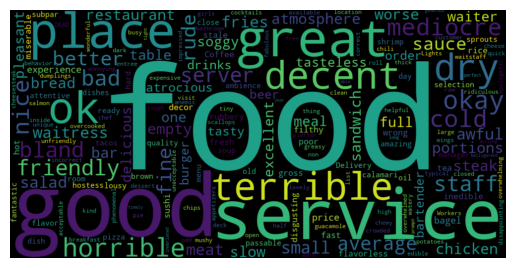

In [252]:
wordcloud = WordCloud(width=1000, height=500)

wordcloud.generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Use KMeans to identify themes (did not work)

In [254]:
reviews_list = []

for match in matches2:
    reviews_list.append(doc[match[1]:match[2]].text)

In [354]:
text = 'This is an apple'

doc = nlp(text)

for token in doc.ents:
    print(token, token.label_)

In [269]:
from sklearn.preprocessing import normalize

span1 = nlp('service was terrible')
span2 = nlp('service was atrocious')
span3 = nlp('service was good')

def vectorize(text):
    # Get the SpaCy vector -- turning off other processing to speed things up
    return nlp(text).vector

# Now we stack the vectors and normalize them
# Inputs are typically called "X"
X = normalize(np.stack([vectorize(review) for review in reviews_list]))
print("X (the document matrix) has shape: {}".format(X.shape))
print("That means it has {} rows and {} columns".format(X.shape[0], X.shape[1]))

X (the document matrix) has shape: (727, 300)
That means it has 727 rows and 300 columns


In [270]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
print("X2 shape is {}".format(X2.shape))

X2 shape is (727, 2)


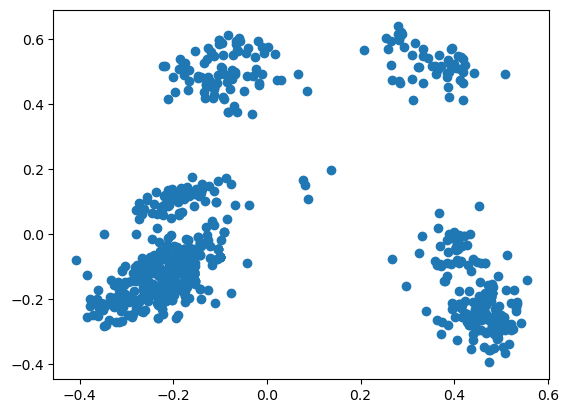

In [304]:
plt.scatter(X2[:, 0], X2[:, 1])

In [305]:
CLUSTERS = 4

# First we fit the model...
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=CLUSTERS, random_state=1)
k_means.fit(X)

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [306]:
common_words = k_means.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    # print(num)
    # print(centroid)
    print(str(num) + ' : ' + ', '.join(reviews_list[word] for word in centroid))
    print('\n')


0 : shrimp were soggy and small, ribs were dry, Coffee is mediocre and, ours was cold and, food was terrible, items were old, staff was unorganized and, sushi was good, food was decent and, Workers are great and, platter was full, place was disgusting and inedible, food was subpar, Food is bad, Delivery is faster, food is perfect and timely, server was apologetic but, place is expensive and, foreman is African, night was nice and, deck is nice and, bread was rubbery, food is hot and fresh, lighting was cute and, seating is helpful


1 : Food was cold and, food was good, hamachi was tasty but, foreman is African, shrimp were soggy and small, card was red and, food was decent and, food was worse, ribs were dry, Food is bad, food is perfect and timely, service was great, sandwich was dry and, platter was full, chili was bland and, ours was cold and, bread was rubbery, bacon was passable but, soup are bland, staff was unorganized and, soup was good, Food is decent and, atmosphere is nice, 

### Look for similar reviews using Spacy similarity

In [343]:
span1 = nlp('the hostess was nice')
span2 = nlp('the service was rude')
span3 = nlp('the service was horrible')

# for token in nlp(span1):
#     print(token.text, token.vector)

In [344]:
def print_comparison(a, b):
    # Create the doc objects
    a = nlp(a)
    b = nlp(b)
    # Euclidean "L2" distance
    distance = np.linalg.norm(a.vector - b.vector)
    # Cosine similarity
    similarity = a.similarity(b)
    print("-" * 80)
    print("A: {}\nB: {}\nDistance: {}\nSimilarity: {}".format(a, b, distance, similarity))

print_comparison(span1, span2)
print_comparison(span1, span3)
print_comparison(span2, span3)

--------------------------------------------------------------------------------
A: the hostess was nice
B: the service was rude
Distance: 19.40860939025879
Similarity: 0.8628482645809623
--------------------------------------------------------------------------------
A: the hostess was nice
B: the service was horrible
Distance: 19.65070343017578
Similarity: 0.866649943563273
--------------------------------------------------------------------------------
A: the service was rude
B: the service was horrible
Distance: 9.551081657409668
Similarity: 0.9701576037196293


### Continue with spaCy

In [8]:
# Training the entity rule to recognize food

food_df = pd.read_csv('data/food_labels.csv')

In [138]:
food = food_df[food_df['description'].str.contains('[^a-zA-Z]') == True]['description']

In [139]:
food = food[food.str.split().apply(len) <= 2].drop_duplicates()

In [140]:
food = food.str.lower()

In [ ]:
food[food.str.contains(',') == True] # Please fix: Foods are comma seperated and order is reversed: 'muffins, blueberry'

In [154]:
food[food.str.contains('[^s]$')] #  Fix missing plurals with LemmInflect

182            walnut butter
206           teriyaki sauce
236         italian dressing
241            fresco cheese
294          italian sausage
                 ...        
1673869    scallops uncooked
1674996              pop set
1675057        baba ghanouge
1677708    pasta, tagliarini
1692082    shawarma marinade
Name: description, Length: 11684, dtype: object

In [156]:
import spacy
import lemminflect

nlp = spacy.load('en_core_web_lg')
doc = nlp('shawarma marinade')
doc[2]._.lemma()         # 'test'
doc[4]._.inflect('NNS')  # 'examples'

IndexError: [E040] Attempt to access token at 2, max length 2.

In [157]:
food

182            walnut butter
195            tita crackers
206           teriyaki sauce
214           dessert shells
236         italian dressing
                 ...        
1677708    pasta, tagliarini
1679322         pork riblets
1679410    dried cranberries
1692082    shawarma marinade
1694154       golden nuggets
Name: description, Length: 16966, dtype: object

In [112]:
foods = food  # Where to include plural recognition?

patterns = []

nlp = spacy.load('en_core_web_lg')


ruler = nlp.add_pipe('entity_ruler', before='ner')

for food in foods:
    patterns.append({'label': 'FOOD', 'pattern': food})

ruler.add_patterns(patterns)

In [ ]:
patterns

In [127]:
import spacy
from spacy.matcher import Matcher

# nlp = spacy.load('en_core_web_lg')

matcher = Matcher(nlp.vocab)

pattern = [
    {'ENT_TYPE': 'FOOD'},  # Don't forget to include plurals
    {'LEMMA': 'be'},  # Add 'taste' and 'seem' to the list? Yields 7 and 8 more results.
    # {'DEP': 'neg', 'OP': '?'},
    # {'POS': 'ADV', 'OP': '*'},
    {'POS': 'ADJ'},
    {'POS': 'CCONJ', 'OP': '?'},
    {'POS': 'ADJ', 'OP': '?'}

]
matcher.add('NOUN_IS_ADJECTIVE', [pattern], greedy='LONGEST')
doc=nlp(reviews_text)
matches2 = matcher(doc)

SyntaxError: invalid syntax (575365183.py, line 9)

In [124]:
print(len(matches2))
for match in matches2:
    print(doc[match[1]:match[2]])

300
rice was overcooked and dry
food is hot and fresh
chicken was rubbery and inedible
shrimp were soggy and small
bar is long but tight
food is perfect and timely
steak was dry and overdone
sauce was thick and plentiful
tuna was underdone and chewy
dip was lumpy and dry
stromboli was dry and tasteless
food is sloppy and messy
food is mediocre &
pie was salty and
food is awful and
sandwich was watery and
pork was dry and
guacamole was terrible and
bread was good but
tacos were good but
seltzer was okay and
food was average and
sandwich was dry and
pudding was dry and
shrimp was overcooked and
bread was good but
shrimp were sour and
udon was good and
meat was tough and
chips were stale and
salsa was ok but
tacos were edible but
tacos were good but
food was cold and
bratwurst was dry and
food was edible and
bacon was passable but
eggplant was soggy and
sushi was alright but
food was OK but
meat was dry and
chips were stale and
meals were soggy and
food was sparse and
bread was fine and
s